NLP & Computer Vision
# **Group Assignment**
### **Fitbot: Nutrition Assistant**
Professor: Hing Azegrouz Attibbi

Assignment done by: 
- João André Pinho
- Joseph Guss
- Max Heilingbrunner
- Niccolò Matteo Borgato
- Sebastian Viehhofer

---------

#  **Business Case and Dataset Description**

<center><img src="logofitbot.png" width="200"/></center>

<u>**Business Case Description:**</u>

• **The Idea - FitBot:** FitBot is a Personal Food Assistant chat bot. It is designed to analyze the nutritional content of foods through computer vision modelling (using YOLO V8) and provides immediate feedback on the foods users consume. FitBot is helping to make informed and healthier dietary choices.

• **Value Proposition:** FitBot offers unique value to its users as it acts as a personalized dietary assistant that provides real-time nutritional insights. This helps users better understand their food consumption and make healthier decisions.

• **Stakeholders:** End-users, health professionals, and potential sponsors such as wellness brands or health insurance companies are potential stakeholders.

• **Risks:** We might face competition from similar apps, have to ensuring data privacy. Our results also need to be very precise, so that the customers keep trusting in the application.


<u>**Problem Definition:**</u>


• **The Modern Lifestyle Dilemma:** The modern lifestyle, characterized by a fast-paced routine, often leaves little time for a healthy meal preparation. Fast-food and frozen food become more and more popular options, which has disturbed people's eating habits.

• **Health Problems:** Fast foods and pre-prepared meals can create a lot of health problems, including obesity and diabetes.

• **Lack of Knowledge:** Not many people know about the nutritional content of these convenience foods. Many consumers are simply unaware of the nutritional implications of their dietary choices, often underestimating calorie content and overestimating nutritional value.

<u>**Dataset Description:**</u>

• **Data Sources and Division:** Given the problem at hand, Roboflow was used for searching the possible food datasets and once these where found, to perform additional labeling. For the FitBot's development two different datasets from different sources where combined, in order to enrich the model's robustness to different picture scenes but also its robustness to different food classes. It is further divided into training, validation, and testing sets.

• **Categories:** The dataset consists of images representing 26 food classes. Most of these (24,000 images) form the training set, while 1,200 are used for validation, and 782 form the testing set.

• **Data Augmentation:** To increase the model's robustness and the amount of available data, data augmentation techniques such as geometric transformations (i.e, rotate, strech, zoom...), color space transformations (i.e, brightness, contrast, change RGB channels) and filtering (i.e., sharpness and gaussian blur) were applied to these images.

<center><img src="images\foods_markdown.jpg" width="300"/></center>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#  **Resolution**

### **• Installers Using Pip:**

Installing the necessary libraries using Pip Install.

In [1]:
# Pip installing the necessary libraries. 
!pip install ultralytics==8.0.20
!pip install roboflow

ERROR: Ignored the following versions that require a different python version: 8.0.10 Requires-Python >=3.7,<=3.11; 8.0.11 Requires-Python >=3.7,<=3.11; 8.0.12 Requires-Python >=3.7,<=3.11; 8.0.13 Requires-Python >=3.7,<=3.11; 8.0.14 Requires-Python >=3.7,<=3.11; 8.0.15 Requires-Python >=3.7,<=3.11; 8.0.16 Requires-Python >=3.7,<=3.11; 8.0.17 Requires-Python >=3.7,<=3.11; 8.0.18 Requires-Python >=3.7,<=3.11; 8.0.19 Requires-Python >=3.7,<=3.11; 8.0.20 Requires-Python >=3.7,<=3.11; 8.0.21 Requires-Python >=3.7,<=3.11; 8.0.22 Requires-Python >=3.7,<=3.11; 8.0.23 Requires-Python >=3.7,<=3.11; 8.0.24 Requires-Python >=3.7,<=3.11; 8.0.25 Requires-Python >=3.7,<=3.11; 8.0.26 Requires-Python >=3.7,<=3.11; 8.0.27 Requires-Python >=3.7,<=3.11; 8.0.28 Requires-Python >=3.7,<=3.11; 8.0.29 Requires-Python >=3.7,<=3.11; 8.0.30 Requires-Python >=3.7,<=3.11; 8.0.31 Requires-Python >=3.7,<=3.11; 8.0.32 Requires-Python >=3.7,<=3.11; 8.0.33 Requires-Python >=3.7,<=3.11; 8.0.34 Requires-Python >=3.7,<=3.

### **• Libraries and Module Imports:**

Importing the necessary libraries and modules to manipulate and interact with the dataset.

In [88]:
import os
from IPython import display
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow
import glob
from sklearn.model_selection import ParameterGrid
from ultralytics import YOLO
import ultralytics

import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import shutil
import tqdm
import glob
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### **• Inspect GPU Power:**

If recognizable the GPU can be used for speeding up the training and testing stages.

In [2]:
# Inspecting the GPU specs.
!nvidia-smi

Fri Jul  7 11:19:51 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.25                 Driver Version: 536.25       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P0              27W /  90W |    931MiB /  8192MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART I: Baseline Testing with the Model Created on Roboflow**

### **• Initial Setup:**

Importing OS and checking if the necessary libraries are properly set up.

In [89]:
# Getting the current working directory.
import os
HOME = os.getcwd()
print(HOME)

c:\Users\joaop\Desktop\food-detection-classification


In [90]:
# Checking if ultralytics is properly imported.
ultralytics.checks()

Ultralytics YOLOv8.0.124  Python-3.11.2 torch-2.0.1+cpu CPU
Setup complete  (16 CPUs, 15.4 GB RAM, 406.4/936.2 GB disk)


### **• Import the Model Trained by the Team on Roboflow:**

Importing the Nutrition Model that was composed and trained on Roboflow.

In [91]:
# Importing the Model:

# Creating a Roboflow instance using the provided API key.
rf = Roboflow(api_key="Z55dUUrj0gRjWFCUAEAT")

# Fetching the Nutrition FitBot project from the workspace of the API Key.
project = rf.workspace().project("nutrition-fitbot")

# Declaring the model variable as the first version of the model from the project.
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


### **• Predict a Sample Image using the Trained Model:**

Predicting a local image with the imported model from Roboflow.

{'predictions': [{'x': 828, 'y': 916, 'width': 1352, 'height': 754, 'confidence': 0.8223530054092407, 'class': 'Sushi', 'image_path': 'images/sushi.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '2560', 'height': '1707'}}


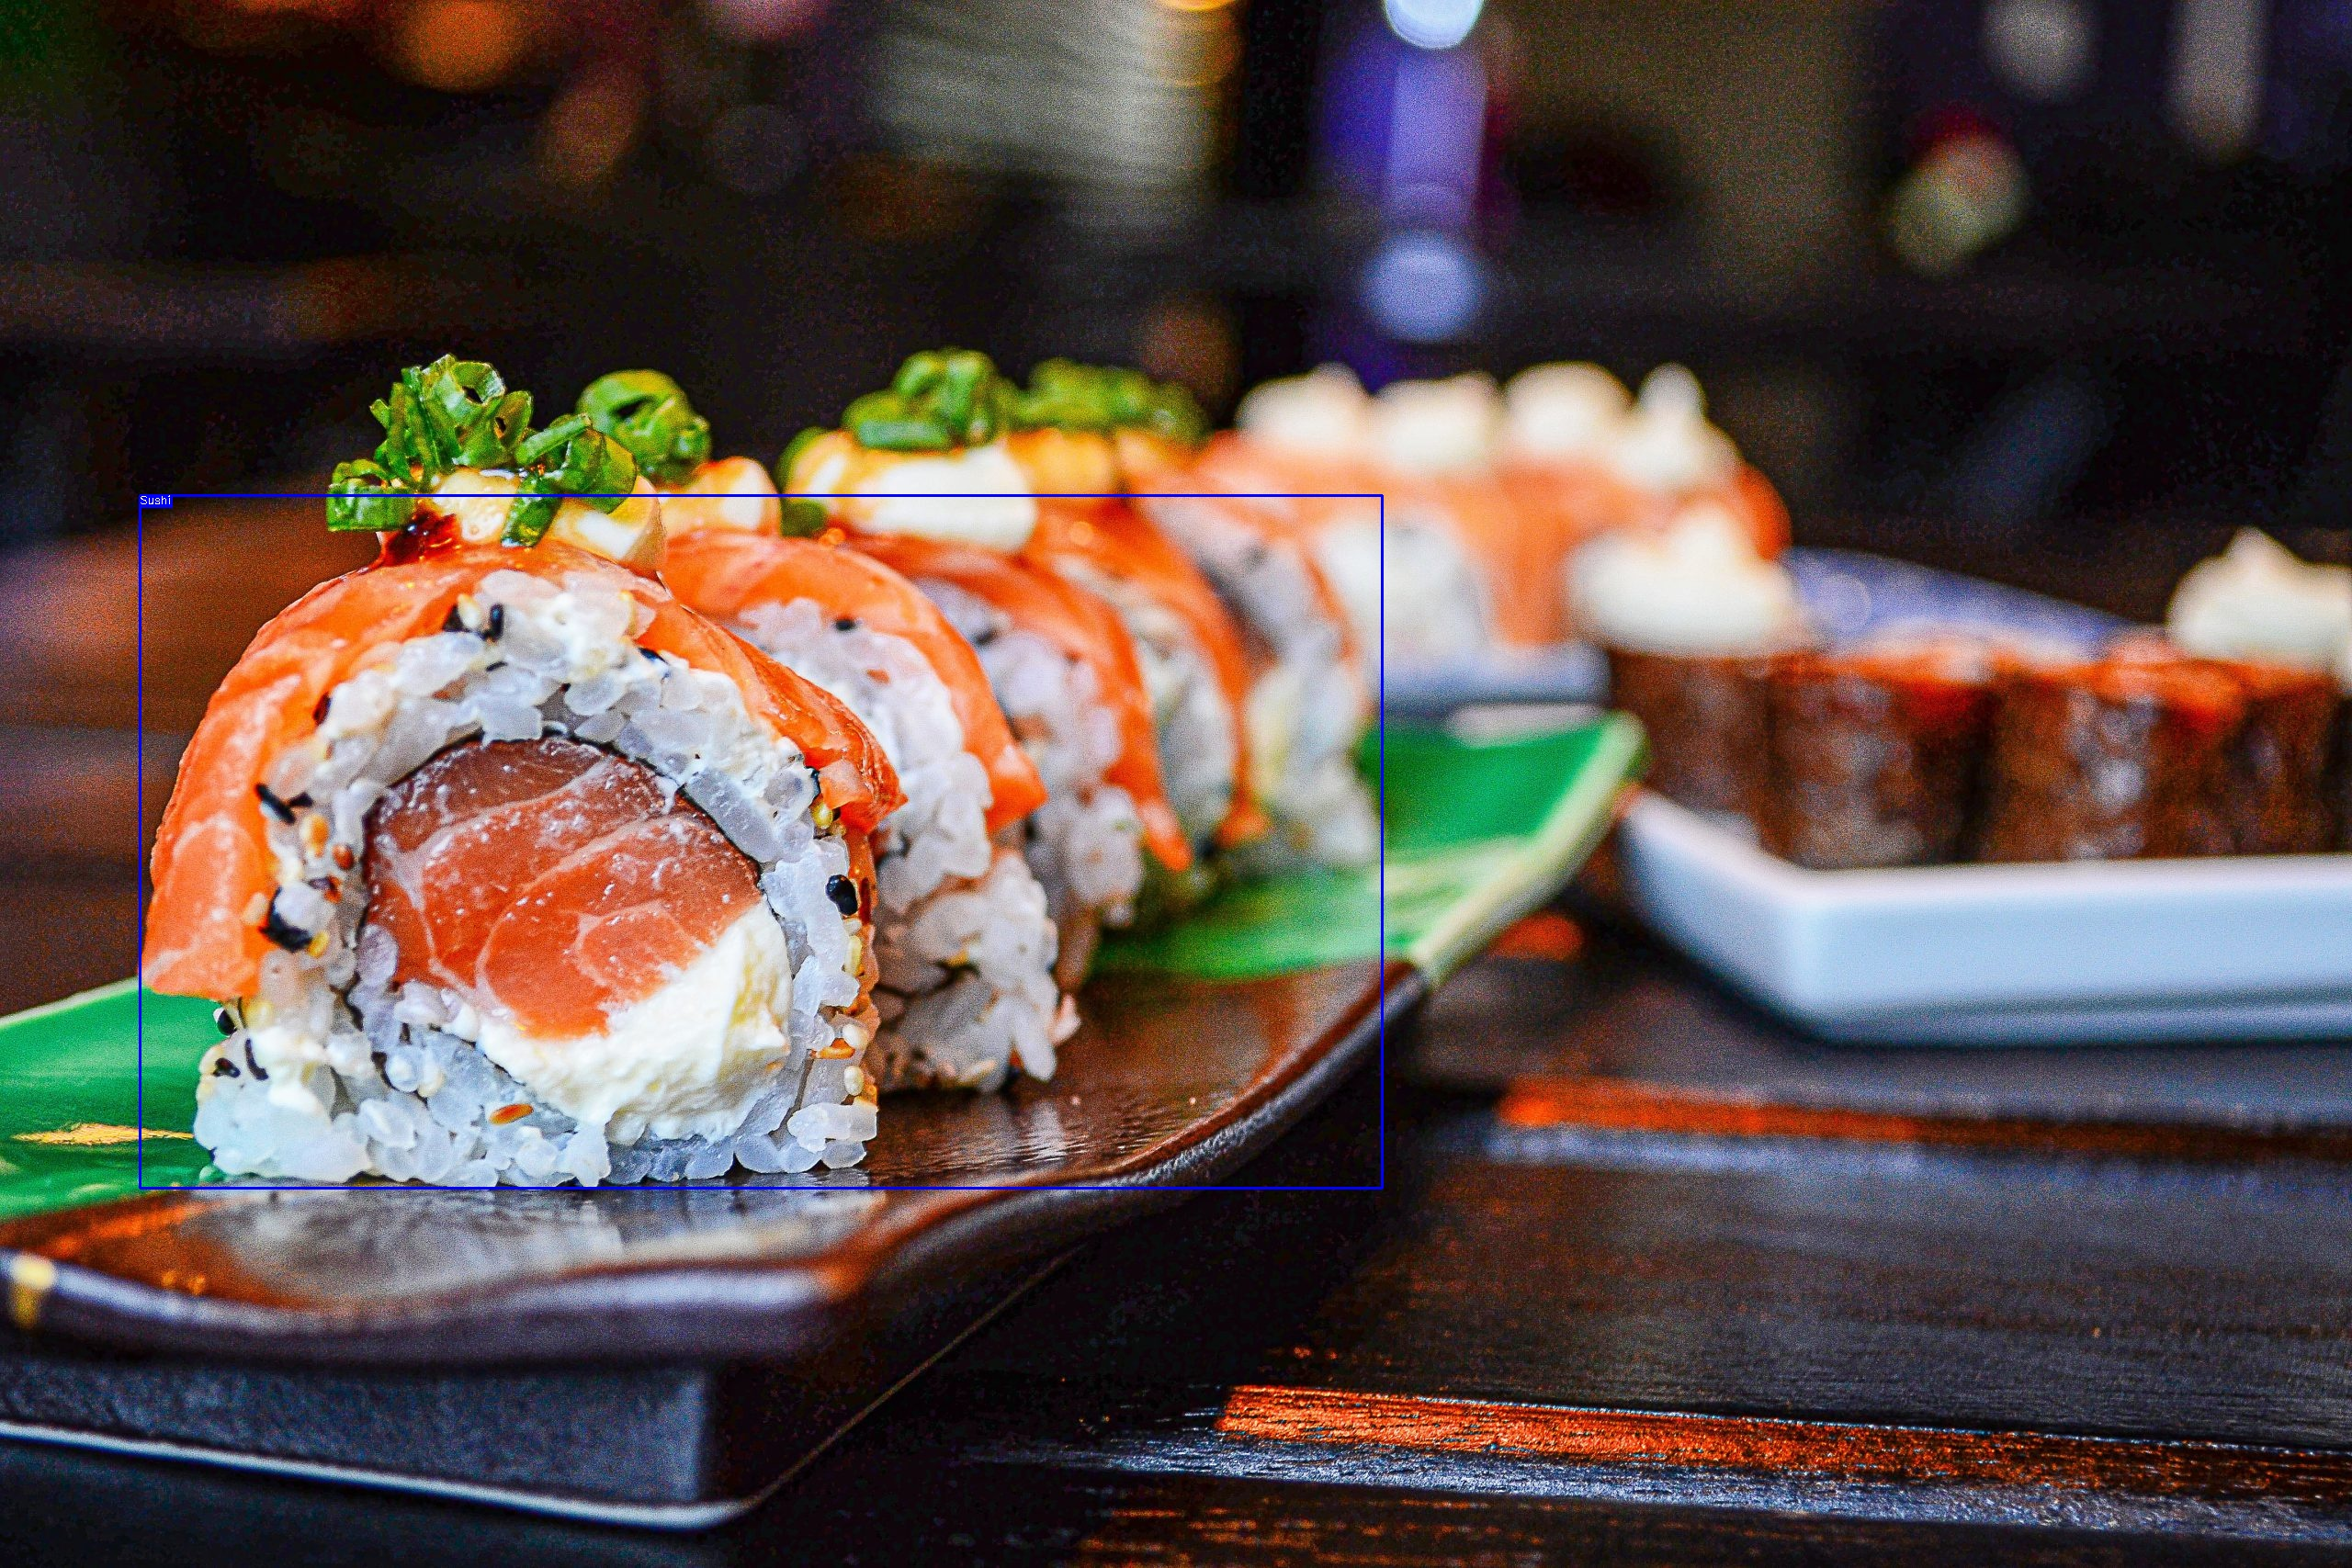

In [13]:
# Declaring the local image name.
image_name = "sushi"

# Predicting the image class while filtering out the detections with a confidence level below 50% and any overlaps (Intersection over Union - IoU) of more 50% of the scoring box.
data = model.predict(f"images/{image_name}.jpg", confidence=50, overlap=50).json()
print(data)

# Visualizing the made prediction.
model.predict(f"images/{image_name}.jpg", confidence=50, overlap=50).save(f"predictions/{image_name}_prediction.jpg")

# Showing the image.
Image(filename=f'predictions/{image_name}_prediction.jpg', height=600)

In [28]:
# Extracting the class and the confidence level of the prediction.
pic_info = [(prediction['class'], prediction['confidence']) for prediction in data['predictions']]

# Printing the list of class types with their confidence levels.
for info in pic_info:
    print(f"Class: {info[0]}, Confidence: {info[1]:2f}%")

Class: Sushi, Confidence: 0.822353%


**Insights:** As this image belonged to one of the classes that was trained - "Sushi", the YOLO V8 model that was trained was perfectly capable to identify it with a relatively high confidence level.

## **PART II: Custom Model Training Created on IDE**

### **• Train the YOLO V8 Model:**

Training the object detection model over 3 epochs.

In [29]:
# Running this cell only once, comment to avoid retraining.
# dataset = project.version(1).download('yolov8')

#!yolo task=detect mode=train model=yolov8n.pt data=nutrition-fitbot-1/data.yaml epochs=3 imgsz=640

New https://pypi.org/project/ultralytics/8.0.128 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.124  Python-3.11.2 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=nutrition-fitbot-1/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=

**Insights:** The choice to train only 1 model on a larger dataset across fewer epochs was made to maximize the model's learning from a variety of scenarios, as opposed to memorizing patterns from a smaller pool of images. In settings with time constraints, this approach has demonstrated superiority over using smaller datasets with higher epoch counts. With a total of 26 classes in this case, our priority was enhancing the model's robustness towards new, unseen images, making this modelling method particularly beneficial.

## **PART III: Model Evaluation**

### **• Check the Precision and Recall - Confidence Curve:**

Visualizing the Precision and Recall Confidence curves for evaluating the performance of the model.

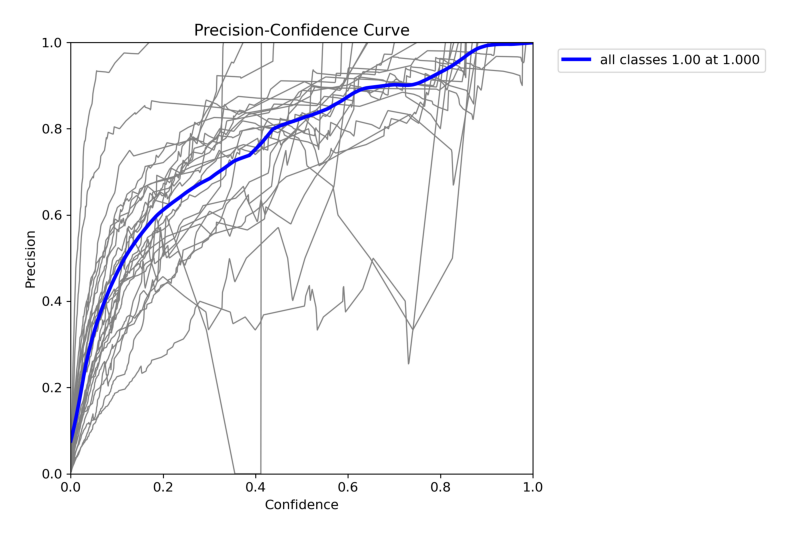

In [50]:
# Defining the path to the Precision Confidence Curve Image.
image_dir = "runs/detect/train9/"
image_name = "P_curve.png"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(10, 10))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

**Insight:** As interpreted by the chart, it can be concluded that besides for the images detected with a confidence level of under 30%, above this mark the model performs exceptionally well registering precision levels (proportion of true predictions among all positive predictions) above 70%, an excellent result for such a low number of epochs and with the opportunity to be improved by hyperparameter tuning.

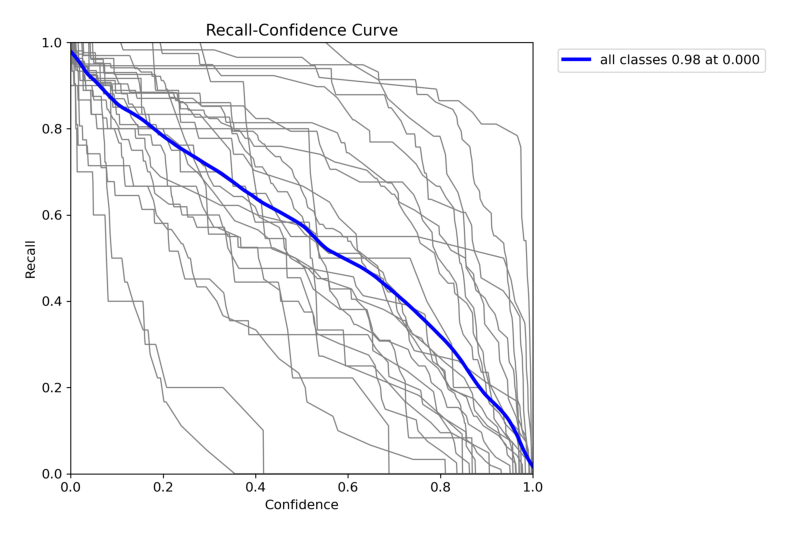

In [52]:
# Defining the path to the Recall Confidence Curve Image.
image_dir = "runs/detect/train9/"
image_name = "R_curve.png"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(10, 10))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

**Insight:** As interpreted by the chart, it can be concluded that besides for the images detected with a confidence level of under 30%, above this mark the model performs exceptionally well registering recall levels (proportion of true predictions among all actuall positive intances) above 70%, an excellent result for such a low number of epochs and with the opportunity to be improved by hyperparameter tuning.

### **• Check the F1 Score - Confidence Curve:**

Visualizing the F1 Score Confidence curves for evaluating the performance of the model.

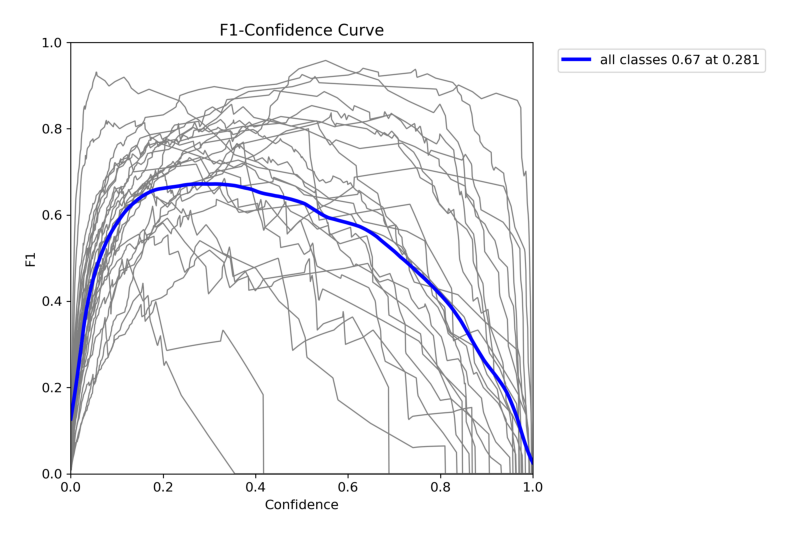

In [53]:
# Defining the path to the F1 Confidence Curve Image.
image_dir = "runs/detect/train9/"
image_name = "F1_curve.png"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(10, 10))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

**Insight:** As interpreted by the chart, it can be seen that an F1-Score of above 50% is maintained throughout the confidence interval of 0.1 and 0.7, which indicates a solid balance between precision and recall for a considerably high number of images detected (most fell within this interval).

### **• Check the Normalized Covariance Matrix:**

Visualizing the Normalized Covariance Matrix in order to assess the precision of the trained model.

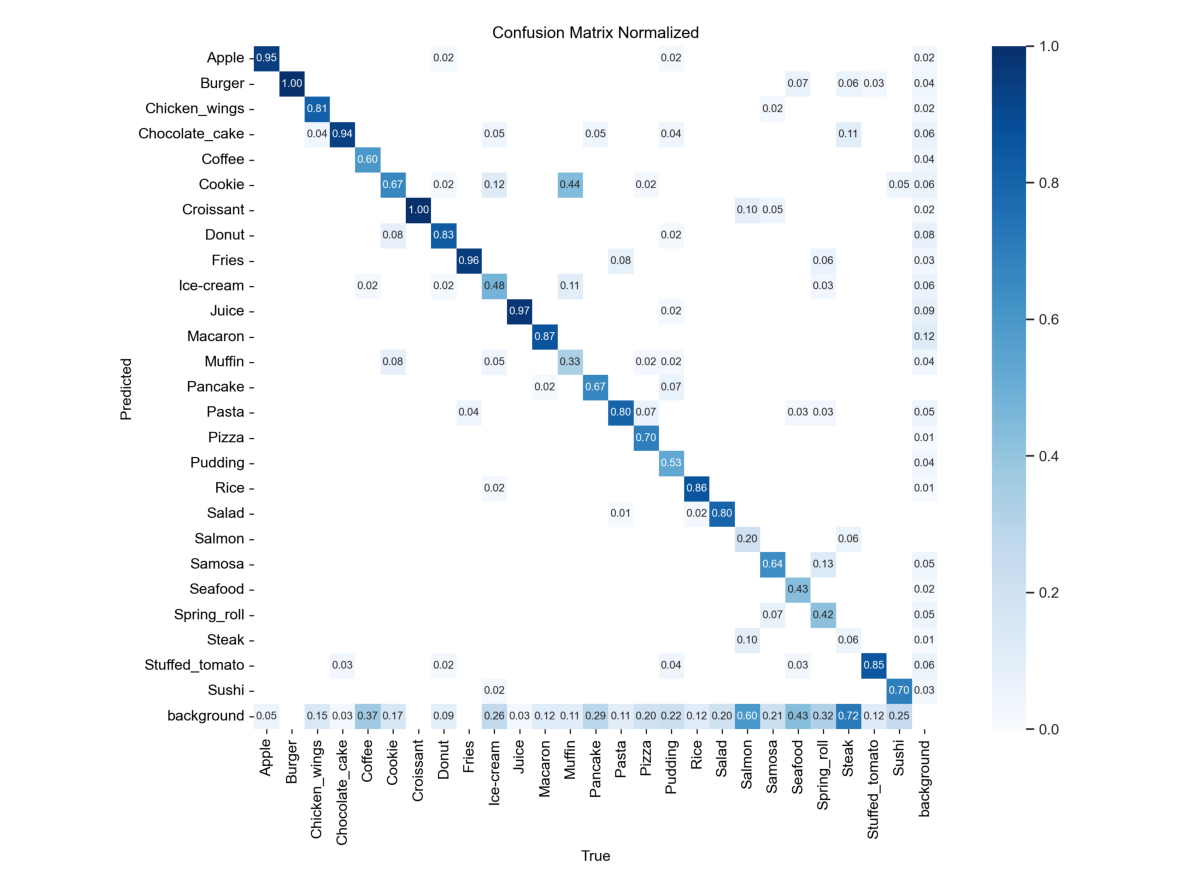

In [55]:
# Defining the path to the Normalized Covariance Matrix Image.
image_dir = "runs/detect/train9/"
image_name = "confusion_matrix_normalized.png"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(15, 15))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

**Insight:** As evidenced by the strong diagonal alignment between predicted and actual classes in the matrix, the model exhibits high performance in classifying different foods. Although there is room for improvement, particularly in the misclassification between foods and a simple background (no detection), this information lends credence to the hypothesis that the model will perform well during the testing stage.

### **• Overview of the Train and Validation Results:**

Visualizing the both the classification and detection performance for the training and validation stages.

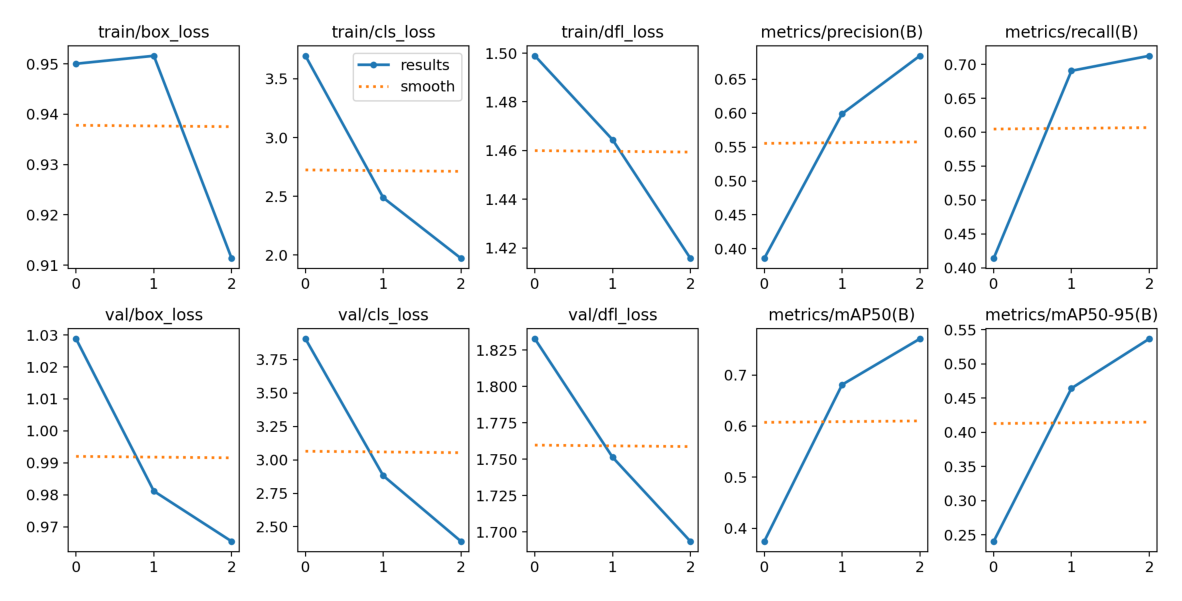

In [56]:
# Defining the path to the Results Image.
image_dir = "runs/detect/train9/"
image_name = "results.png"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(15, 15))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

**Insights:** 

Starting with the **Box Loss** - the error in predicting the bounding boxes around the objects in the image - the reduction of the loss is noticeable from epoch 2 onwards, which demonstrates the importance and effectiveness of running multiple training episodes. As the training loss ended up being slightly lower than the validation, it is safe to say that some overfitting has ocurred. I

In terms of the **Class Loss** - the error in predicting the classes of obects in an image - the training set also performed slightly better than the validation, registering the highest amplitude of gain in performance from epoch 1 to epoch 2. 

Finally, regarding **Mean Average Precision at IoU (Intersection at Union) at 50%**, the growth in percentual value across all the 3 performed epochs is notorious, indiciating the that with more training, the model would perform better in terms of both precision and recall at IoU 0.50.

### **• Other Charts and Metrics:**

Visualizing the additional charts and metrics ploted.

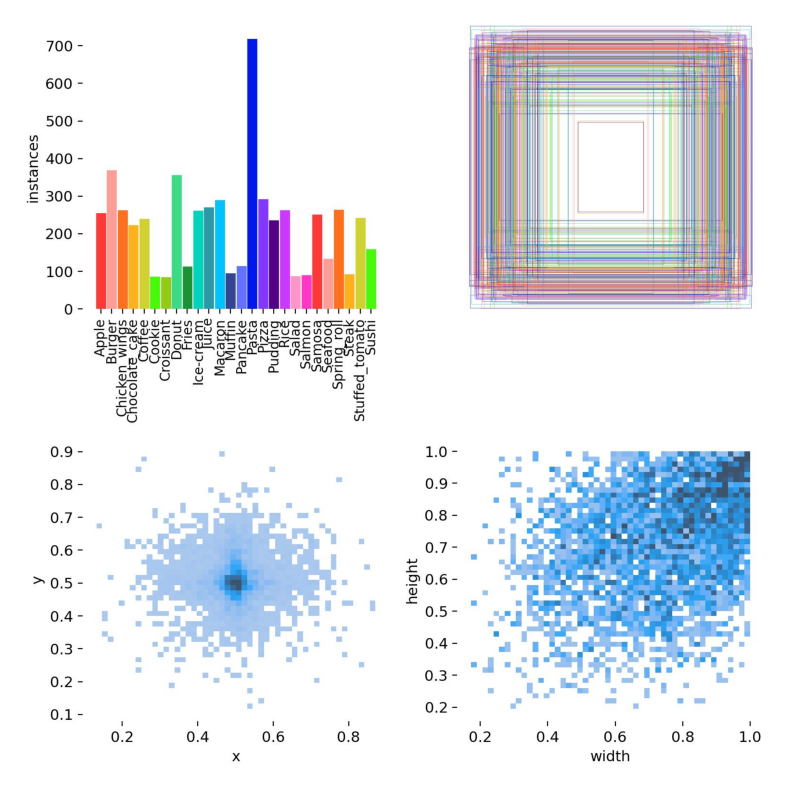

In [60]:
# Defining the path to the additional charts.
image_dir = "runs/detect/train9/"
image_name = "labels.jpg"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(10, 10))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

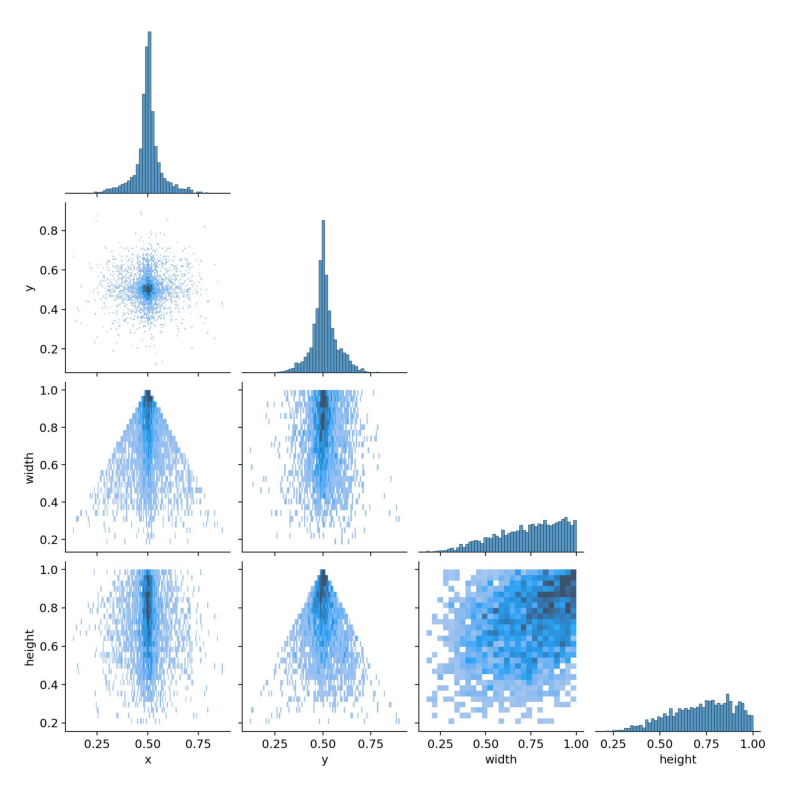

In [61]:
# Defining the path to the additional charts.
image_dir = "runs/detect/train9/"
image_name = "labels_correlogram.jpg"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(10, 10))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

### **• Visualize the Training and Validation Detection Batch Outcome:**

Checking the performance of the training and validation batches that were used for the detection.

<u>**- Training Batch**</u>

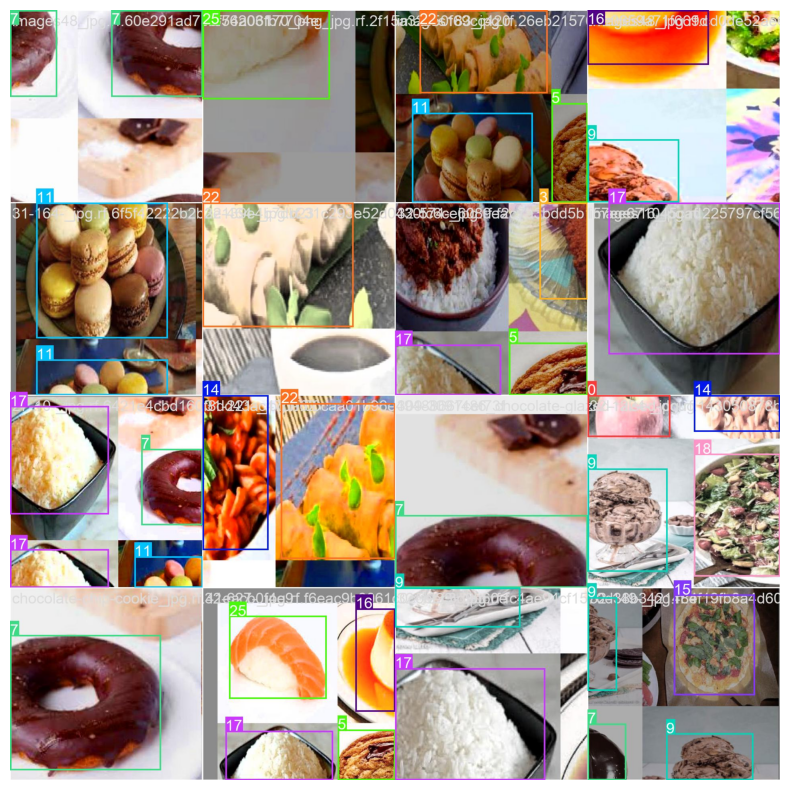

In [62]:
# Defining the path to the additional charts.
image_dir = "runs/detect/train9/"
image_name = "train_batch0.jpg"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(10, 10))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

<u>**- Validation Batch**</u>

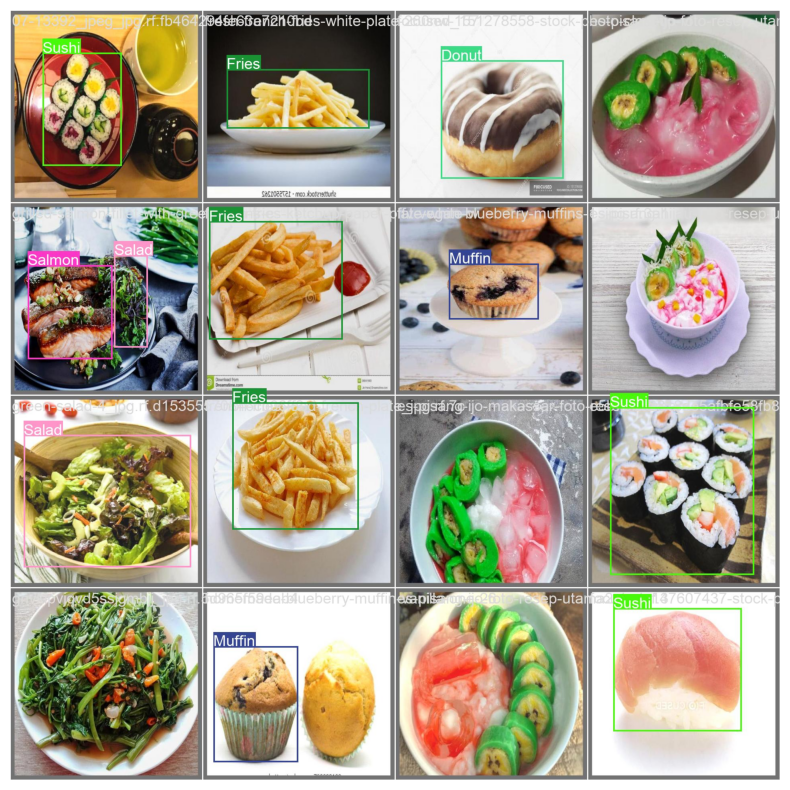

In [63]:
# Defining the path to the additional charts.
image_dir = "runs/detect/train9/"
image_name = "val_batch0_labels.jpg"

# Full path to the image.
image_path = image_dir + image_name

# Defining a figure with a specific size (width, height).
plt.figure(figsize=(10, 10))

# Reading the image file.
img = mpimg.imread(image_path)

# Removing grid.
plt.grid(False)

# Removing axis.
plt.axis('off')

# Plotting the image.
plt.imshow(img)
plt.show()

**Insights:** As seen, both stages did a solid job to use the model for detecting the different foods (one easier than others), which solidifies the idea that this one being an excellent choice for a first MVP.

## **PART III: Testing**



### **• Test a Random Sample of Images:**

Testing a sample of 2 images to assess the performance of the model with new and never previously seen pictures.

In [ ]:
# Defining the directory containing your test images.
images_path = "nutrition-fitbot-1/test/images"

# Randomly selecting5 images from the test directory.
test_images = random.sample(os.listdir(images_path), 2)

# Set up figure for plotting
plt.figure(figsize=(20, 10))

for i, image_name in enumerate(test_images):
    # Full path to the image.
    image_path = os.path.join(images_path, image_name)
    
    # Predicting using your model - replace "model" with your actual model name.
    # Ensuring that this 'predict' method is appropriate for your specific model.
    results = model.predict(image_path, conf=0., save=True, line_width=2)

    # Outputing directory where Ultralytics YOLO saves images - adjust 'exp' as needed.
    saved_image_path = os.path.join('nutrition-fitbot-1/test/images', image_name)

    # Adding subplot.
    plt.subplot(1, 5, i+1)

    # Loading and display the image with predictions.
    img = plt.imread(saved_image_path)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

<center><img src="predictions\burger_prediction.jpg" width="800"/></center>

<center><img src="predictions\donut_prediction.jpg" width="800"/></center>

## **PART IV: Additional Remarks**



### **• Possible Avenues of Improvement:**

Utilizing the power of cloud to train the model with a higher number of epochs or training different sets of hyperparameters in a cluster set of machines to speed up the process, techniques like grid search CV could help boost the performance of the model and the overall quality of the MVP. 

**- Snippet of Code Resembling the Possible Methods to be Used in Future Improvements:**

In [ ]:
# Define a grid of hyperparameters
# param_grid = {'lr': [0.1, 0.01, 0.001],
#               'batch_size': [16, 32, 64],
#               'epochs': [5, 10, 20]}

# # Iterate over each combination of hyperparameters
# for params in ParameterGrid(param_grid):

#     # Train a model with the current hyperparameters
#     model = YOLO("yolov8n.pt")
#     model.train(data="coco128.yaml", epochs=params['epochs'], batch_size=params['batch_size'], lr=params['lr'])

#     # Evaluate the model and store the performance metrics
#     metrics = model.val()

#     # Keep track of the hyperparameters that result in the best performance
#     if metrics['mAP'] > best_mAP:
#         best_mAP = metrics['mAP']
#         best_params = params

# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)